In [1]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker

# Display options
from IPython.display import display
pd.options.display.max_columns = None

np.set_printoptions(threshold=30)

# Plots style
import matplotlib as mpl
from cycler import cycler

mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 10

mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['xtick.color'] = '#A9A9A9'
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['ytick.color'] = '#A9A9A9'

mpl.rcParams['grid.color'] = '#ffffff'

mpl.rcParams['axes.facecolor'] = '#ffffff'

mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False

mpl.rcParams['axes.prop_cycle'] = cycler(color=['#2EBCE7', '#84EE29', '#FF8177'])

$$
\def\var{{\text{Var}}} % Variance
\def\corr{{\text{Corr}}} % Correlation
\def\cov{{\text{Cov}}} % Covariance
\def\expval{{}}
\newcommand\norm[1]{\lVert#1\rVert} % norm
\def\setR{{\rm I\!R}} % Sets
\def\rx{{\textrm{X}}} % Scalar random variables
\def\ry{{\textrm{Y}}}
\def\rz{{\textrm{Z}}}
\def\rvx{{\textbf{X}}} % Vector random variables
\def\rvy{{\textbf{Y}}}
\def\rvz{{\textbf{Z}}}
\def\vtheta{{\boldsymbol{\theta}}} % Vectors
\def\va{{\boldsymbol{a}}}
\def\vb{{\boldsymbol{b}}}
\def\vi{{\boldsymbol{i}}}
\def\vj{{\boldsymbol{j}}}
\def\vp{{\boldsymbol{p}}}
\def\vq{{\boldsymbol{q}}}
\def\vu{{\boldsymbol{u}}}
\def\vv{{\boldsymbol{v}}}
\def\vw{{\boldsymbol{w}}}
\def\vx{{\boldsymbol{x}}}
\def\vy{{\boldsymbol{y}}}
\def\vz{{\boldsymbol{z}}}
\def\evu{{u}} % Elements of vectors
\def\evv{{v}}
\def\evw{{w}}
\def\evx{{x}}
\def\evy{{y}}
\def\evz{{z}}
\def\mA{{\boldsymbol{A}}} % Matrices
\def\mB{{\boldsymbol{B}}}
\def\mC{{\boldsymbol{C}}}
\def\mD{{\boldsymbol{D}}}
\def\mI{{\boldsymbol{I}}}
\def\mQ{{\boldsymbol{Q}}}
\def\mS{{\boldsymbol{S}}}
\def\mT{{\boldsymbol{T}}}
\def\mU{{\boldsymbol{U}}}
\def\mV{{\boldsymbol{V}}}
\def\mW{{\boldsymbol{W}}}
\def\mX{{\boldsymbol{X}}}
\def\mLambda{{\boldsymbol{\Lambda}}}
\def\mSigma{{\boldsymbol{\Sigma}}}
\def\emA{{A}} % Elements of matrices
\def\emB{{B}}
\def\emX{{X}}
\def\tT{{T}} % Transformations
\def\textless{<}
$$



Common Probability Distributions
================================

So far in this book, you’ve learned about different probability
distributions, such as the normal and uniform distributions. In this
chapter, you’ll learn about important discrete and continuous
probability distribution functions.

To specify the distribution of a random variable, we use the tilde
symbol: $\sim$. For instance, $\rx \sim \mathcal{P}$ means that a random
variable $\rx$ has a distribution $\mathcal{P}$.

3.1 Uniform Distribution
------------------------

*Uniform distributions* describe random experiments where each possible
outcome has the same probability of occurring.

For instance, rolling a die or flipping a coin corresponds to discrete
uniform distributions.

Uniform distributions can also be continuous, as shown in Figure
[46](#fig:ch04_uniform_distribution). With a continuous uniform
distribution bounded between $a$ and $b$, the probability of getting a
value less than $a$ or greater than $b$ is 0. For the values between $a$
and $b$, each interval of the same size is associated with the same
probability.

<figure>
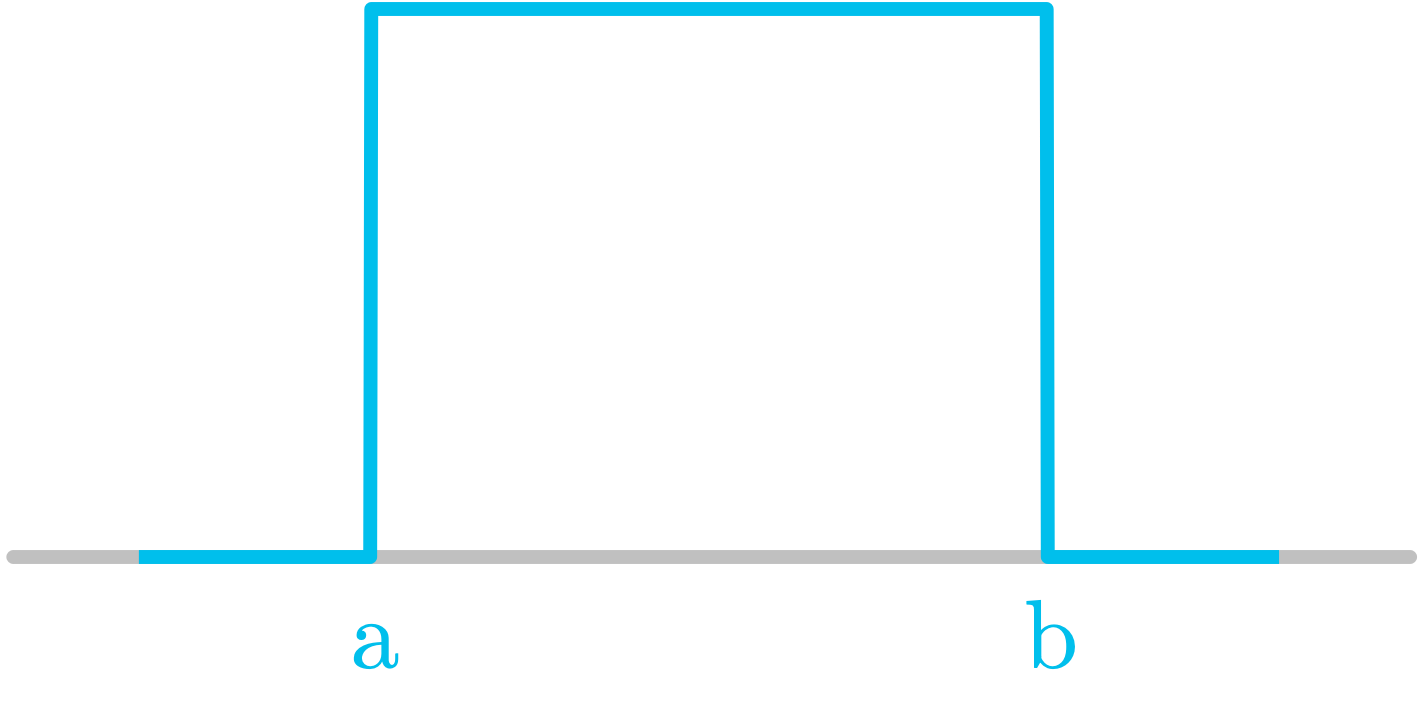<figcaption aria-hidden="true">Figure 46: Continuous uniform distribution with bounds <span class="math inline"><em>a</em></span> and <span class="math inline"><em>b</em></span>.</figcaption>
</figure>

3.2 Gaussian distribution
-------------------------

*Gaussian distributions*, also called *normal distributions* are one of
the most important probability density functions. They are used to model
the distribution of continuous random variables. Their shape looks like
a bell (as shown in Figure [47](#fig:ch04_output_gaussian_example)):
there is a peak of probability that decreases when you move off.

In the context of machine learning, Gaussian distributions are used in
various algorithms like Gaussian Mixture Models (GMM) or Gaussian
Processes.

### 3.2.1 Formula

The formula of the Gaussian distribution is described by the following
equation:

$$
\mathcal{N}(\rx=x ; \mu,\,\sigma^{2}) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{1}{2\sigma^2}(x - \mu)^2}
$$

First, the stylized *N* ($\mathcal{N}$) is the symbol representing the
Gaussian distribution.

The semicolon in $\mathcal{N}(\rx=x ; \mu,\,\sigma^{2})$ indicates that
the distribution is *parametrized* by the two parameters $\mu$ (the mean
of the distribution) and $\sigma^2$ (the variance). (as usual, you can
refer to Section 12
for details about the notation. This notation is used for instance in
Goodfellow, Ian, Yoshua Bengio, and Aaron Courville. Deep learning. MIT
press, 2016.) These parameters $\mu$ and $\sigma$ are not random
variables but determine the distribution (the mean shifts the curve and
the variance changes the width of the bell, as you’ll see in this
section).

The distribution is a function of $x$, which is an outcome of the random
variable $\rx$. This is the input of the function.

The part of the equation $\frac{1}{\sqrt{2\pi \sigma^2}}$ is used to
normalize the curve so that the total area under the curve is equal to
one.

Let’s implement the Gaussian function:

In [2]:
def gaussian(x, mu, sigma):
    return (1 / np.sqrt(2 * np.pi * sigma ** 2)) *\
        np.exp(-(1 / (2 * sigma ** 2)) * (x - mu) ** 2)

Let’s plot a Gaussian function with a mean of 0.5 and a standard
deviation of 0.1. You can create an array (`x_axis`) using `np.arange()`
containing values that will be evaluated by the function (the output
will be stored in `y_axis`).

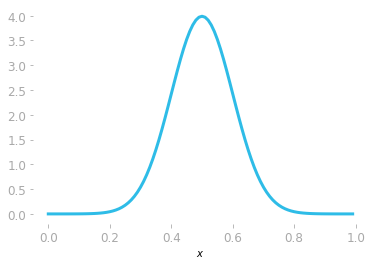

In [3]:
x_axis = np.arange(0, 1, 0.01)
y_axis = gaussian(x_axis, 0.5, 0.1)
plt.plot(x_axis, y_axis)

plt.xlabel("$x$")
plt.show()


<figure>
<figcaption aria-hidden="true">Figure 47: An example of Gaussian distribution, with a mean of 0.5 and a standard deviation of 0.1.</figcaption>
</figure>

Figure [47](#fig:ch04_output_gaussian_example) shows a normal
distribution with mean 0.5 and standard deviation 0.1.

### 3.2.2 Parameters

You saw that Gaussian distributions are parametrized by two parameters:
the mean ($\mu$) and the variance ($\sigma^2$).

The width of the curve depends on the variance $\sigma^2$ (in addition,
the inverse of the variance $\frac{1}{\sigma^2}$ is called the
*precision*: a small precision corresponds to a wide bell shape) : a
wide bell shape corresponds to a large variance.

Let’s see the effect of $\sigma$:

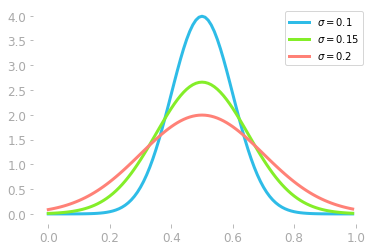

In [4]:

x_axis = np.arange(0, 1, 0.01)

plt.plot(x_axis, gaussian(x_axis, 0.5, 0.1), label="$\sigma=0.1$")
plt.plot(x_axis, gaussian(x_axis, 0.5, 0.15), label="$\sigma=0.15$")
plt.plot(x_axis, gaussian(x_axis, 0.5, 0.2), label="$\sigma=0.2$")
plt.legend()
plt.show()


<figure>
<figcaption aria-hidden="true">Figure 48: Effect of the standard deviation <span class="math inline"><em>σ</em></span> on the scale of the normal distribution.</figcaption>
</figure>

Figure [48](#fig:ch04_output_gaussian_effect_sigma) shows the effect of
the standard deviation on the shape of the normal distribution.

Here is an example of the effect of the mean $\mu$:

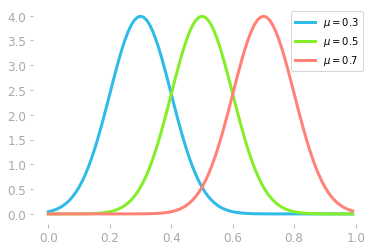

In [5]:

x_axis = np.arange(0, 1, 0.01)

plt.plot(x_axis, gaussian(x_axis, 0.3, 0.1), label="$\mu=0.3$")
plt.plot(x_axis, gaussian(x_axis, 0.5, 0.1), label="$\mu=0.5$")
plt.plot(x_axis, gaussian(x_axis, 0.7, 0.1), label="$\mu=0.7$")
plt.legend()
plt.show()


<figure>
<figcaption aria-hidden="true">Figure 49: Effect of the mean <span class="math inline"><em>μ</em></span> on the normal distribution.</figcaption>
</figure>

Figure [49](#fig:ch04_output_gaussian_effect_mu) shows that the mean
shifts the curve without changing its shape.

### 3.2.3 Requirements

The Gaussian function satisfies the requirements of probability density
distributions.

First, it returns only non-negative outputs:

$$
\mathcal{N}(\rx=x ; \mu,\,\sigma^{2}) \geq 0
$$

Second, the total area under the curve (corresponding to the total
probability) is equal to 1:

$$
\int_{-\infty}^{+\infty} \mathcal{N}(x ; \mu,\,\sigma^{2}) \; dx = 1
$$

The normal distribution is widely used partly because a lot of random
events are well described by it. One reason for that comes from the
central limit theorem as you saw in the hands-on project in
Section 2.7.

3.3 Bernoulli Distribution
--------------------------

The *Bernoulli distribution*, named after the mathematician Jacob
Bernoulli, describes binary experiments where outcomes can only be 0 or
1 (such as a coin flip). This distribution has a single parameter $\mu$
(you can read other names denoting this parameter, such as $\phi$ and
$\theta$), such as $0 \leq \mu \leq 1$. This represents the probability
that the outcome will be 1, so you have:

$$
P(\rx=1 ; \mu) = \mu
$$

This means that the probability that the random variable $\rx$ takes the
value 1 is equal to $\mu$ (because of the semicolon).

Similarly, the probability that the random variable $\rx$ takes the
value 0 corresponds to $1 - \mu$:

$$
P(\rx=0 ; \mu) = 1 - \mu
$$

For instance, if you have a biased coin that lands ‘heads’ in 80% of the
throws, and that a random variable $\rx$ maps ‘heads’ to 1 and ‘tails’
to 0, you have $\mu=0.8$. The probability to land ‘tails’ is then
$1-\mu=1-0.8=0.2$, or 20%.

The Bernoulli probability distribution can encode both of these
probabilities ($P(\rx=1 ; \mu)$ and $P(\rx=0 ; \mu)$) in a single
expression:

$$
\text{Bern}(\rx=x ; \mu) = \mu^x(1 - \mu)^{1-x}
$$

This is the Bernoulli probability distribution. Since a number raised at
the power 0 is equal to 1, and doesn’t change when it is raised to the
power of 1, you can check that it works for the two possible outcomes 0
and 1:

$$
\text{Bern}(\rx=0 ; \mu) = \mu^0(1 - \mu)^{1-0} = 1 \cdot (1 - \mu) = 1 - \mu
$$

and

$$
\text{Bern}(\rx=1 ; \mu) = \mu^1(1 - \mu)^{1-1} = \mu
$$

You can also check that the sum of the probabilities is equal to 1, as
it should be for a probability distribution:

$$
\begin{aligned}
\sum_{x=0}^1 \text{Bern}(\rx=x ; \mu) &= \text{Bern}(\rx=0 ; \mu) + \text{Bern}(\rx=1 ; \mu) \\\\
&= 1 - \mu + \mu \\\\
&= 1
\end{aligned}
$$

3.4 Binomial Distribution
-------------------------

### 3.4.1 Description

You can use *Binomial distributions* when a binary experiment is ran
multiple times. You can use the binomial distribution to answer
questions like: “What is the probability of getting ‘heads’ twice if you
flip a coin three times?” Bernoulli distributions are a special case of
binomial distributions, when the experiment is ran once.

The binomial distribution is defined as following:

$$
\text{Bin}(m ;N, \mu)  = \binom{N}{m} \mu^m (1-\mu)^{N-m}
$$

The binomial distribution (denoted as $\text{Bin}$) gives the
probability of getting $m$ positive outcome over $N$ trials.

To understand this expression, let’s consider the example of multiple
coin flips: you want to know the probability of getting ‘heads’ twice in
three coin flip. Let’s say that the outcome ‘heads’ is encoded as 1
(positive trial) and ‘tails’ as 0. Since you ask for the probability to
have two ‘heads’ and three trials, $m=2$ and $N=3$ in the formula. As
with the Bernoulli distribution, $\mu$ is the parameter corresponding to
the probability to get the positive outcome (in our case, ‘heads’).
Let’s say that the coin is fair, so $\mu= 0.5$.

First, $\mu^m$ encodes the fact that you want $m$ ‘heads’, each having
the probability $\mu$ of occurring. Since the trials are independent,
you can multiply the probabilities. In the example, the probability of
getting two ‘heads’ is thus $\mu \times \mu = \mu^2$. More generally,
the probability of getting $m$ ‘heads’ is $\mu^m$.

Second, $(1-\mu)^{N-m}$ encodes the probabilities for the remaining
trials. In the example, you still need to multiply by the probability of
getting one ‘tails’ in the last trial: you don’t want three heads, but
exactly two. This is expressed by the probability of getting ‘tails’
($1-\mu$) raised to the power of the number of times you want ‘tails’,
which is the number of remaining trials: $N-m$.

Note that $\mu^m (1-\mu)^{N-m}$ doesn’t take into account the fact that
multiple combinations are possible. For instance, if you get “heads”,
“heads”, and “tails”, you have exactly two “heads”, but it is also
possible to get “tails”, “heads”, and “heads”. This is the purpose of
$\binom{N}{m}$. It is pronounced “$N$ choose $m$” and it is called the
*binomial coefficient*. It refers to the number of possible
combinations, with $N$ being the number of trials (3 in our last
example) and $m$ the number of positive outcomes (in our example, 2).

It is calculated as follows:

$$
\binom{N}{m} = \frac{N!}{(N-m)!m!} \text{ for } m \leq N
$$

The exclamation point means *factorial* (for instance, $N!$ is
pronounced “$N$ factorial”), which refers to multiplying the number by
itself minus one until you reach one. For instance,

$$
4! = 4 \cdot 3 \cdot 2 \cdot 1
$$

Note that $0!=1$ by convention.

Let’s calculate the binomial coefficient for our last example:

In [6]:
def binomial_coeff(N, m):
    return np.math.factorial(N) / (np.math.factorial(N-m) * np.math.factorial(m))

In [7]:
binomial_coeff(N=3, m=2)

3.0

This means that there are three possible ways to get two ‘heads’ with
three flips.

You can do it manually to understand this result. First, list the
possible outcomes (‘heads’ is represented as “H” and ‘tails’ as “T”.):
HHH, HHT, HTH, THH, HTT, THT, TTH, or TTT.

So there are 8 possibilities. Listing the combinations where you get
exactly two heads (HHT, HTH and THH) shows that there are three possible
combinations that met the requirements.

You can now implement the binomial function:

In [8]:
def binomial(m, N, mu):
    return binomial_coeff(N=N, m=m) * (mu ** m)  * ((1 - mu) ** (N - m))

Note that this implementation is for illustration purpose but will
overflow with larger values of $N$ and $m$.

In [9]:
binomial(m=2, N=3, mu=0.5)

0.375

You can also use the function `binom.pmf` from the `scipy.stats` module.
(see the documentation here:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html.
Note that the name of the parameters are different.)

In [10]:
from scipy.stats import binom

binom.pmf(2, 3, 0.5)

0.375

You get $0.375=\frac{3}{8}$, which corresponds also to what you
calculated by listing the combinations manually.

### 3.4.2 Graphical Representation

You can calculate the probability of getting various numbers of ‘heads’
for, say 100 trials, and plot the distribution.

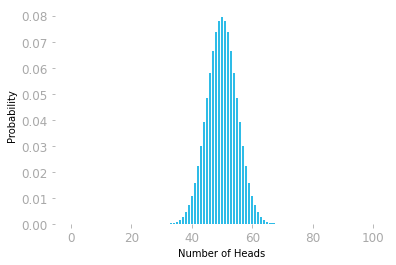

In [11]:
N = 100
all_binomial_proba = np.zeros(N + 1)
for i in range(N + 1):
    all_binomial_proba[i] = binom.pmf(i, N, 0.5)

plt.bar(np.arange(len(all_binomial_proba)), all_binomial_proba, width=0.7)
# [...] Add axes

plt.xlabel("Number of Heads")
plt.ylabel("Probability")
plt.show()


<figure>
<figcaption aria-hidden="true">Figure 50: Probability to get various numbers of <span class="math inline"><em>N</em></span> in 100 trials.</figcaption>
</figure>

Here is how you can interpret Figure
[50](#fig:ch04_output_binomial_distribution_large_number): you have a
large probability to get around 50 ‘heads’ (because in this example,
$\mu=0.5$). This probability decreases for a smaller or larger number of
‘heads’. For instance, it is quite not probable to get 70 ‘heads’ over
the 100 trials.

You can see that when the number of trials is large enough, the
distribution looks like the normal distribution. This shows that the
binomial distribution can be approximated by normal distributions for
large $N$.

3.5 Poisson Distribution
------------------------

The *Poisson distribution*, named after the French mathematician Denis
Simon Poisson, is a discrete distribution function describing the
probability that an event will occur a certain number of times in a
fixed time (or space) interval. It is used to model count-based data,
like the number of emails arriving in your mailbox in one hour or the
number of customers walking into a shop in one day, for instance.

### 3.5.1 Mathematical Definition

Let’s start with an example, Figure [51](#fig:ch04_poisson_ex) shows the
number of emails received by Sarah in intervals of one hour.

<figure>
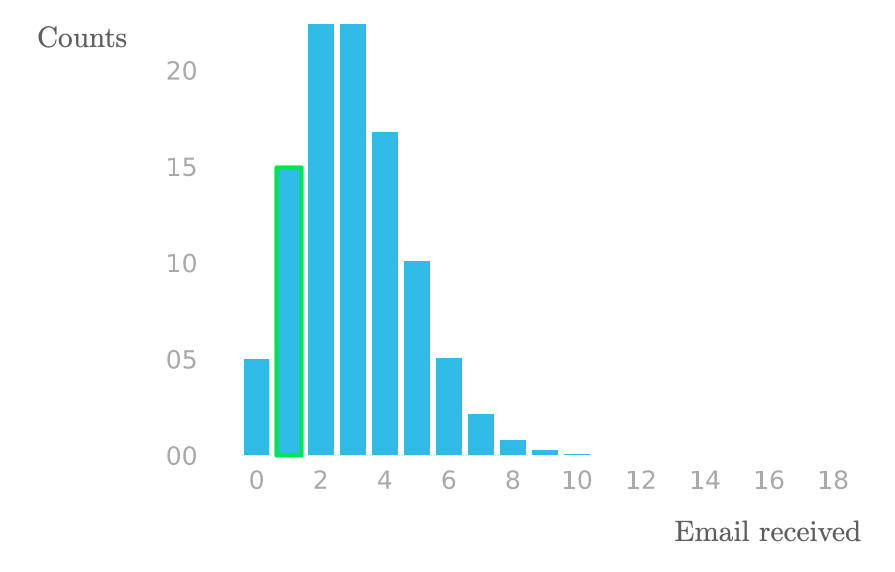<figcaption aria-hidden="true">Figure 51: Emails received by Sarah in one-hour intervals for the last 100 hours.</figcaption>
</figure>

The bar heights show the number of one-hour intervals in which Sarah
observed the corresponding number of emails. For instance, the
highlighted bar shows that there were around 15 one-hour slots where she
received a single email.

The Poisson distribution is parametrized by the expected number of
events $\lambda$ (pronounced “lambda”) in a time or space window. The
distribution is a function that takes the number of occurrences of the
event as input (the integer called $k$ in the next formula) and outputs
the corresponding probability (the probability that there are $k$ events
occurring).

The Poisson distribution, denoted as $\text{Poi}$ is expressed as
following:

$$
\text{Poi}(k ; \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

for $k=0, 1, 2, ...$.

The formula of $\text{Poi}(k ; \lambda)$ returns the probability of
observing $k$ events given the parameter $\lambda$ which corresponds to
the expected number of occurrences in that time slot.

Note that both the binomial and the Poisson distributions are discrete:
they give probabilities of discrete outcomes: the number of times an
event occurs for the Poisson distribution and the number of successes
for the binomial distribution. However, while the binomial calculates
this discrete number for a discrete number of trials (like a number of
coin toss), the Poisson considers an infinite number of trials (each
trial corresponds to a very small portion of time) leading to a very
small probability associated with each event.

You can refer to
Section 3.5.3
to see how the Poisson distribution is derived from the binomial
distribution.

### 3.5.2 Example

Priya is recording birds in a national park, using a microphone placed
in a tree. She is counting the number of times a bird is recorded
singing and wants to model the number of birds singing in a minute. For
this task, she’ll assume independence of the detected birds.

Looking at the data of the last few hours, Priya observes that in
average, there are two birds detected in an interval of one minute. So
the value 2 could be a good candidate for the parameter of the
distribution $\lambda$. Her goal is to know the probability that a
specific number of birds will sing in the next minute.

Let’s implement the Poisson distribution function from the formula you
saw above:

In [12]:
def poisson_distribution(k, lambd):
    return (lambd ** k * np.exp(-lambd)) / np.math.factorial(k)

Remember that $\lambda$ is the expected number of times a bird sings in
a one-minute interval, so in this example, you have $\lambda=2$. The
function `poisson_distribution(k, lambd)` takes the value of $k$ and
$\lambda$ and returns the probability to observe $k$ occurrences (that
is, to record $k$ birds singing).

For instance, the probability of Priya observing 5 birds in the next
minute would be:

In [13]:
poisson_distribution(k=5, lambd=2)

0.03608940886309672

The probability that 5 birds will sing in the next minute is around
0.036 (3.6%).

As with the binomial function, this will overflow for larger values of
$k$. For this reason, you might want to use `poisson` from the module
`scipy.stats` (see the doc here:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)
, as following:

In [14]:
from scipy.stats import poisson

poisson.pmf(5, 2)

0.03608940886309672

Let’s plot the distribution for various values of $k$:

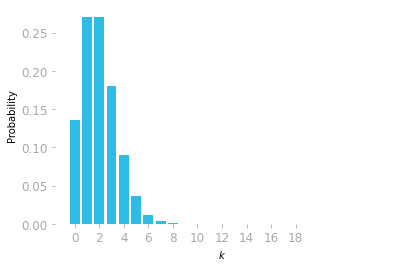

In [15]:
lambd=2

k_axis = np.arange(0, 25)
distribution = np.zeros(k_axis.shape[0])
for i in range(k_axis.shape[0]):
    distribution[i] = poisson.pmf(i, lambd)

plt.bar(k_axis, distribution)
# [...] Add axes, labels...

plt.xticks(np.arange(0, 20, 2))
plt.xlabel("$k$")
plt.ylabel("Probability")
plt.show()


<figure>
<figcaption aria-hidden="true">Figure 52: Poisson distribution for <span class="math inline"><em>λ</em> = 2</span>.</figcaption>
</figure>

The probabilities corresponding to the values of $k$ are summarized in
the probability mass function shown in Figure
[52](#fig:ch04_output_poisson_lambda_2). You can see that it is most
probable that Priya will hear one or two birds singing in the next
minute.

Finally, you can plot the function for different values of $\lambda$:

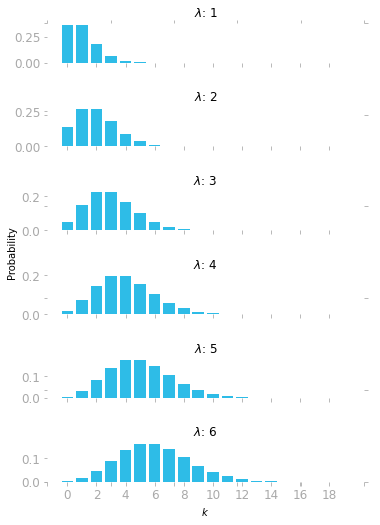

In [16]:
f, axes = plt.subplots(6, figsize=(6, 8), sharex=True)

for lambd in range(1, 7):

    k_axis = np.arange(0, 20)
    distribution = np.zeros(k_axis.shape[0])
    for i in range(k_axis.shape[0]):
        distribution[i] = poisson.pmf(i, lambd)

    axes[lambd-1].bar(k_axis, distribution)
    axes[lambd-1].set_xticks(np.arange(0, 20, 2))
    axes[lambd-1].set_title(f"$\lambda$: {lambd}")
    
# Add axes labels etc.

f.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel("$k$")
plt.ylabel("Probability")
f.tight_layout(pad=2.0)
plt.show()


<figure>
<figcaption aria-hidden="true">Figure 53: Poisson distribution for various values of <span class="math inline"><em>λ</em></span>.</figcaption>
</figure>

Figure [53](#fig:ch04_output_poisson_lambda) shows the Poisson
distribution for various values of $\lambda$, which looks a bit like a
normal distribution in some cases. However, the Poisson distribution is
discrete, not symmetric when the value of $\lambda$ is low, and bounded
to zero.

### 3.5.3 Bonus: Deriving the Poisson Distribution

Let’s see how the Poisson distribution is derived from the Binomial
distribution.

You saw in Section 3.4 that
if you run a random experiment multiple times, the probability to get
$m$ successes over $N$ trials, with a probability of a success $\mu$ at
each trial, is calculated through the binomial distribution:

$$
\text{Bin}(k ;N, \mu)  = \binom{N}{k} \mu^k (1-\mu)^{N-k}
$$

#### Problem Statement

How can you use the binomial formula to model the probability to observe
an event a certain number of times *in a given time interval* instead of
in a certain number of trials? There are a few problems:

1.  You don’t know $N$, since there is no specific number of trials,
    only a time window.

2.  You don’t know $\mu$, but you have the expected number of times the
    event will occur. For instance, you know that in the past 100 hours,
    you received an average of 3 emails per hour, and you want to know
    the probability of receiving 5 emails in the next hour.

Let’s handle these issues mathematically (you can find more details on
the process in Morin, David J. Probability: For the Enthusiastic
Beginner. Createspace Independent Publishing Platform, 2016. p.209) .

To address the first point, you can consider time as small discrete
chunks. Let’s call these chunck $\epsilon$ (pronounced “epsilon”), as
shown in Figure [54](#fig:appC_split_time). If you consider each chunk
as a trial, you have $N$ chunks.

<figure>
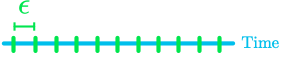<figcaption aria-hidden="true">Figure 54: You can split the continuous time in segments of length <span class="math inline"><em>ϵ</em></span>.</figcaption>
</figure>

The estimation of a continuous time scale is more accurate when
$\epsilon$ is very small. If $\epsilon$ is small, the number of segments
$N$ will be large. In addition, since the segments are small, the
probability of success in each segment is also small.

To summarize, you want to modify the binomial distribution to be able
model a very large number of trials, each with a very small probability
of success. The trick is to consider that $N$ tends toward infinity
(because continuous time is approximated by having a value of $\epsilon$
that tends toward zero).

#### Update the Binomial Formula

Let’s find $\mu$ in this case and replace it in the binomial formula.
You know the expected number of event in a period of time $t$, which
we’ll call $\lambda$ (pronounced “lambda”). Since you split $t$ into
small intervals of length $\epsilon$, you have the number of trials:

$$
N=t \cdot \epsilon
$$

You have $\lambda$ as the number of successes in the $N$ trials. So the
probability $\mu$ to have a success in one trial is:

$$
\mu = \frac{\lambda}{N}
$$

Replacing $\mu$ in the binomial formula, you get:

$$
\binom{N}{k} \left(\frac{\lambda}{N} \right)^k \left(1 - \frac{\lambda}{N} \right)^{N-k}
$$

Developing the expression, writing the binomial coefficient as
factorials (as you did in
Section 3.4), and using the
fact $a^{b-c}=a^b-a^c$, you have:

$$
\frac{N!}{(N-k)!k!} \left(\frac{\lambda}{N} \right)^k \left(1 - \frac{\lambda}{N} \right)^{N} \left(1 - \frac{\lambda}{N} \right)^{-k}
$$

Let’s consider the first element of this expression. If you state that
$N$ tends toward infinity (because $\epsilon$ tends toward zero), you
have:

$$
\lim_{N \to +\infty} \frac{N!}{(N-k)!} = N^k
$$

This is because $k$ can be ignored when it is small in comparison to
$N$. For instance, you have:

$$
\frac{1,000,000!}{(1,000,000-3)!} = 1,000,000 \cdot 999,999 \cdot 999,998
$$

which approximates $1,000,000 \cdot 1,000,000 \cdot 1,000,000$

So you the first ratio becomes:

$$
\frac{N!}{(N-k)!k!} =  N^k \cdot \frac{1}{k!}
$$

Then, using the fact (you can see this link for an example of proof:
https://math.stackexchange.com/questions/882741/limit-of-1-x-nn-when-n-tends-to-infinity)
that $\lim_{N \to +\infty}(1+\frac{\lambda}{N})^N=e^{\lambda}$, you
have:

$$
\lim_{N \to +\infty} \left(1 - \frac{\lambda}{N} \right)^{N} = e^{-\lambda}
$$

Finally, since $\left(1- \frac{\lambda}{N} \right)$ tends toward 1 when
$N$ tends toward the infinity:

$$
\lim_{N \to +\infty} \left(1- \frac{\lambda}{N} \right)^{-k} =  1^{-k} = 1
$$

Let’s replace all of this in the formula of the binomial distribution:

$$
\begin{aligned}
&\lim_{N \to +\infty} \frac{N!}{(N-k)!k!} \left(\frac{\lambda}{N} \right)^k \left(1 - \frac{\lambda}{N} \right)^{N} \left(1 - \frac{\lambda}{N} \right)^{-k} \\\\
&= \lim_{N \to +\infty} N^k \cdot \frac{1}{k!} \cdot \left(\frac{\lambda}{N} \right)^k \cdot e^{-\lambda} \cdot 1 \\\\
&= \lim_{N \to +\infty} \frac{1}{k!} \cdot \left(N\frac{\lambda}{N} \right)^k \cdot e^{-\lambda} \\\\
&= \frac{1}{k!} \cdot \lambda^k \cdot e^{-\lambda} \\\\
&= \frac{\lambda^k e^{-\lambda}}{k!} \\\\
\end{aligned}
$$

This is the Poisson distribution, denoted as $\text{Poi}$:

$$
\text{Poi}(k ; \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

for $k=0, 1, 2, ...$.

3.6 Exponential Distribution
----------------------------

You saw in Section 3.5 that a
Poisson distribution describes the number of times an event occurs in a
fixed interval of time. This number of occurrences corresponds to the
parameter $\lambda$. A related measure, which is modeled by the
*exponential distribution*, is the amount of time between two
occurrences, where you still assume that the events are independent.

The probability density function of exponential distributions is
mathematically expressed as:

$$
\text{Exp}(x; \lambda) =
\begin{cases}
\lambda e^{-\lambda x} & x \geq 0 \\\\
0 & x \textless 0
\end{cases}
$$

The value $\lambda$ before the exponent tells you the starting point of
the decay. You’ll see that this expression can be derived from the
Poisson distribution.

### 3.6.1 Derivation from the Poisson Distribution

The Poisson distribution describes the probability that the event will
occur $k$ times in one unit of time. Remember from
Section 3.5 that the formula
of the Poisson distribution is:

$$
\text{Poi}(k ; \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

Exponential distribution, on the other hand, can describe the waiting
time between events. For a specific waiting time, this can be
reformulated as: “What is the probability that zero event will occur in
this interval?” This corresponds to a Poisson distribution with $k=0$:

$$
\text{Poi}(0 ; \lambda) = \frac{\lambda^0 e^{-\lambda}}{0!} = e^{-\lambda}
$$

So $e^{-\lambda}$ is the probability that no event will occur in one
unit of time. Since events are assumed to be independent, the
probability that no event will occur in two units of time is
$e^{-\lambda} \cdot e^{-\lambda}$. You can go further and calculate the
probability that no event occurs in $x$ unit of times, which would be
$e^{-\lambda x}$.

This is called the *survival function* and tells you the probability
that no event will occur for at least $x$ time units. Similarly,
$1-e^{-\lambda x}$ is the cumulative distribution function corresponding
to the probability that an event will occur in at least $x$ time units.
Since probability distribution functions are derivatives of cumulative
distribution function, the exponential probability distribution function
is the derivative of $1-e^{-\lambda x}$ with respect to $x$, which is
$\lambda e^{-\lambda x}$. That is the exponential distribution.

### 3.6.2 Effect of $\lambda$

Let’s implement the exponential distribution function and visualize the
effect of the expected number of events occurring in one unit of time
$\lambda$:

In [17]:
def exponential(x, lambd):
    return lambd * np.exp(-lambd * x)

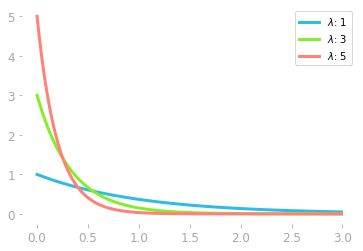

In [18]:
x_axis = np.arange(0, 3, 0.01)
plt.plot(x_axis, exponential(x_axis, lambd=1), label="$\lambda$: 1")
plt.plot(x_axis, exponential(x_axis, lambd=3), label="$\lambda$: 3")
plt.plot(x_axis, exponential(x_axis, lambd=5), label="$\lambda$: 5")

plt.legend()
plt.show()


<figure>
<figcaption aria-hidden="true">Figure 55: Exponential distribution for various values of <span class="math inline"><em>λ</em></span>.</figcaption>
</figure>

Figure [55](#fig:ch04_output_exp_lambda) shows the effect of the
parameter $\lambda$ on the decay of the exponential distribution: you
can see that a large $\lambda$ corresponds to a fast decay.

3.7 Hands-on Project: Waiting for the Bus
-----------------------------------------

Jamal wants to use the exponential distribution to model how long he
would wait the bus. He takes the bus timetables of the bus route he’s
interested in, and focuses on a 12-hour time interval (from 8 am to 8
pm). He reads that there are 48 buses in this time period, corresponding
to an average of 4 buses per hour.

We’ll create an array with random samples drawn from a uniform
distribution to simulate the buses arriving at Jamal’s stop.

In [19]:

np.random.seed(123)

t = 12
n_obs = 48
points_in_time = np.random.uniform(0, t, n_obs)
points_in_time

array([ 8.35763023,  3.43367202,  2.72221744, ...,  3.00546438,
        5.79641117, 11.82671743])

The variable `points_in_time` contains our simulation of the time of
arrivals between 0 (corresponding to 8 am in our example) and 12 (8 pm),
so the time unit is one hour.

Let’s represent the arrival times with a scatter plot:

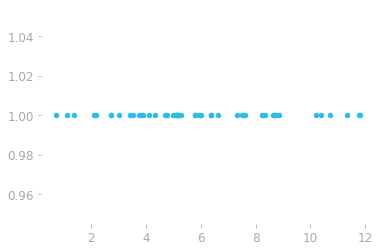

In [20]:
plt.scatter(points_in_time, np.repeat(1, points_in_time.shape[0]), s=20)

plt.show()


<figure>
<figcaption aria-hidden="true">Figure 56: Time of arrival randomly drawn from a uniform distribution.</figcaption>
</figure>

The time of arrival of the 48 buses between 8 am and 8 pm is illustrated
in Figure [56](#fig:ch04_output_time_arrival).

The waiting time corresponds to the difference between two points (this
is the waiting time between two buses). To model these waiting times,
you need to calculate the time between each point. To do that, let’s
sort the array and calculate the differences between each point and the
one before:

In [21]:
points_in_time = np.sort(points_in_time)
diff = points_in_time[1:] - points_in_time[:-1]


You can now look at the distribution of the waiting time.:

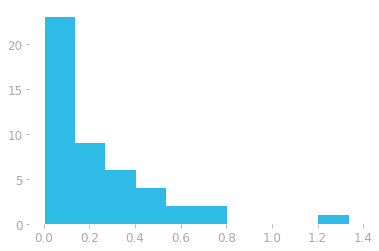

In [22]:
hist = plt.hist(diff, bins=10)

<figure>
<figcaption aria-hidden="true">Figure 57: Distribution of the waiting times.</figcaption>
</figure>

You can see in Figure [57](#fig:ch04_output_waiting_time_distribution)
that the distribution of the waiting times is characterized by more
values around 0 and a rapid decay. This shape is actually the shape of
an exponential function: an exponential decay, mathematically expressed
with a negative value in the exponent. It shows that an exponential
function can describe the duration between occurrences of an event (with
the events occurring at a constant rate and independently, as we assume
for Poisson distributed events).

**More Observations**

Jamal got more data and he now considers 100 days from 8 am to 8 pm
(here, the data is still randomly generated with the function
`np.random.uniform()`). We can use `density=True` in the `hist()`
function of Matplotlib to have the density on the $y$-axis instead of
the counts, and plot the exponential function as a line on the top of
the histogram.

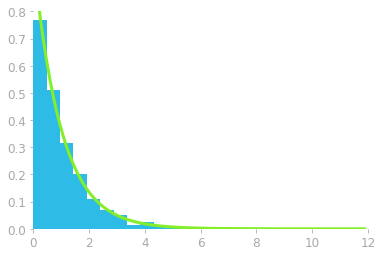

In [23]:
np.random.seed(123)
n_days = 100

lambd = 1

t = 12 * n_days
n_obs = int(t / lambd)

point_in_time = np.random.uniform(0, t, n_obs)
point_in_time = np.sort(point_in_time)

diff = point_in_time[1:] - point_in_time[:-1]
hist = plt.hist(diff, bins=25, density=True,
        range=(0, t / n_days))

x_axis = np.arange(0, t / n_days, (t / n_days) / 100)
plt.plot(x_axis, lambd * np.exp(- lambd * x_axis))

plt.xlim(0, t / n_days)
plt.ylim(0, 0.8)
plt.show()

<figure>
<figcaption aria-hidden="true">Figure 58: Bus waiting time example with more observations.</figcaption>
</figure>

You can see in Figure
[58](#fig:ch04_output_waiting_time_more_observations) that the histogram
corresponds to the exponential probability density function.

You saw in this hands-on project how exponential functions are good
candidates to model events like waiting times. This concludes this
chapter on common probability distributions: you learned about the
uniform, the Gaussian, the Bernoulli, the binomial, the Poisson and the
exponential distributions. You’ll need this knowledge about probability
distributions in the next chapter, for instance to understand the notion
of likelihood used to know the probability that some data comes from a
specific distribution and parameters.

